In [1]:
from numpy.random import default_rng
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

rng = default_rng()

mean = 0.
sd = 0.01

eps = 0.1
steps = 10000

n_exps = 2000

In [2]:
best_ar = pd.DataFrame(columns=range(steps))
r_avg = pd.DataFrame(columns=range(steps))
r_const = pd.DataFrame(columns=range(steps))
for exp in tqdm(range(n_exps)):
    q_true = [0.]*10

    q1 = [0.]*10
    n1 = [0.]*10

    q2 = [0.]*10
    alfa_const = 0.1

    best = []
    r1 = []
    r2 = []

    for _ in range(steps):

        # true
        for i in range(10):
            q_true[i] += rng.normal(mean,sd)
        best.append(max(q_true))

        # sample-average
        i = rng.integers(0,10) if rng.random() < eps else np.argmax(q1)
        r1.append(q_true[i])
        n1[i] += 1
        q1[i] += (q_true[i] - q1[i]) / n1[i]

        # const
        i = rng.integers(0,10) if rng.random() < eps else np.argmax(q2)
        r2.append(q_true[i])
        q2[i] += alfa_const * (q_true[i] - q2[i])
    best_ar.loc[exp] = best
    r_avg.loc[exp] = r1
    r_const.loc[exp] = r2

100%|██████████| 2000/2000 [12:03<00:00,  2.77it/s]


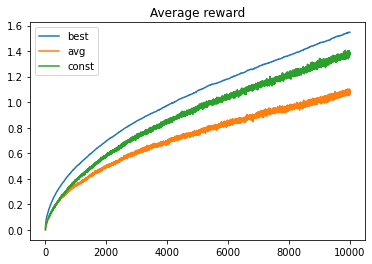

In [18]:
plt.plot(best_ar.mean(),label='best')
plt.plot(r_avg.mean(),label='avg')
plt.plot(r_const.mean(),label='const')
plt.legend()
plt.title('Average reward')
plt.show()

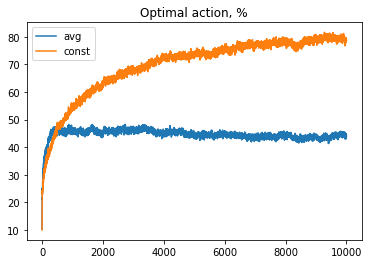

In [20]:
plt.plot((best_ar == r_avg).sum()*100/n_exps,label='avg')
plt.plot((best_ar == r_const).sum()*100/n_exps,label='const')
plt.legend()
plt.title('Optimal action, %')
plt.show()